# PROJECT: NATURAL LANGUAGE PROCESSING WITH DISASTER TWEETS
# ZAKRIA SAAD
# COURSE INSTRUCTOR: DR SUMAN SAHA

### THIS NOTEBOOK CONTAINS EXPLORATORY DATA ANALYSIS PART

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import matplotlib.pyplot as plt
import seaborn as sns
nlp=spacy.load("en_core_web_sm")
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from PIL import Image

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

In [4]:
data=pd.read_csv("/content/drive/MyDrive/train.csv")

In [5]:
data.loc[data['text'].str.contains("ûò")]

,id,keyword,location,text,target


In [6]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
data.shape

(7613, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
data.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [10]:
data.loc[data['text'].str.contains('11-Year-Old Boy Charged')]

,id,keyword,location,text,target
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of T...,1
3591,5130,fatal,Thane,11-Year-Old Boy Charged With Manslaughter of T...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3603,5144,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3604,5145,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of T...,1
3610,5153,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of T...,1
3613,5157,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3614,5159,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1


In [11]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

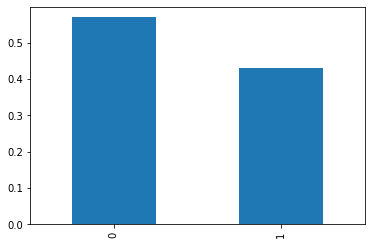

In [12]:
(data["target"].value_counts()/data.shape[0]).plot(kind="bar")

([<matplotlib.patches.Wedge at 0x7f05772c5610>,
 [Text(-1.0732513534192263, -0.24110481617711227, 'no'),
  Text(1.0732513534192263, 0.2411048161771121, 'yes')],
 [Text(-0.5854098291377597, -0.1315117179147885, '57.03%'),
  Text(0.5854098291377597, 0.1315117179147884, '42.97%')])

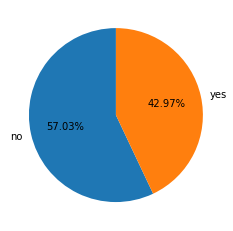

In [13]:
plt.pie(data['target'].value_counts(),labels=['no','yes'],startangle=90,autopct='%.2f%%')

In [14]:
data["keyword"].value_counts() 

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [15]:
data["keyword"].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [42]:
def text_cleaner(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text) # remove extra whitespace
    text = re.sub(r'https?://\S+', '', text) # remove URLs
    text = re.sub(r'u', '', text)
    text = re.sub(r"(?<!\w)u\b", "", text)
    return text

In [29]:
data['tweet_len'] = data['text'].apply(lambda x: len(x.split(' ')))
data.head()

,id,keyword,location,text,target,tweet_len,keyword_stem
0,1,NaN,NaN,or deeds are the reason of this earthqake may ...,1,13,NaN
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7,NaN
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,22,NaN
3,6,NaN,NaN,13000 people receive wildfires evacation order...,1,9,NaN
4,7,NaN,NaN,jst got sent this photo from rby alaska as smo...,1,17,NaN


In [30]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

data["keyword_stem"] = data["keyword"]\
.apply(lambda x: re.sub(r"%20", " ", x) if x is not np.NaN else x)\
.apply(lambda x: stemmer.stem(x) if x is not np.NaN else x)

data.groupby(["target", "keyword_stem"]).size().to_frame().rename({0: "count"}, axis=1).sort_values(["target", "count"], ascending=False).groupby("target").head(20)["count"].to_frame()

count
target keyword_stem       
1      suicide bomb     94
       evacu            85
       derail           82
       flood            66
       fatal            62
       bomb             61
       hijack           50
       attack           46
       devast           45
       bioterror        43
       casualti         43
       forest fir       42
       hostag           42
       outbreak         39
       wreckag          39
       debri            37
       oil spil         37
       typhoon          37
       wound            36
       death            35
0      body bag        100
       scream           94
       obliter          79
       drown            77
       blaze            66
       wreck            66
       crush            60
       explod           59
       fatal            58
       siren            57
       delug            56
       destroy          52
       electrocut       52
       quarantin        52
       desol            51
       injuri           51
       burn             50
       demolish         50
       hijack           50
       surviv           50

In [31]:
data.groupby(["target", "location"]).size().to_frame().rename({0: "count"}, axis=1).sort_values(["target", "count"], ascending=False).groupby("target").head(20)["count"].to_frame()

count
target location               
1      USA                  67
       United States        27
       Nigeria              22
       India                20
       Mumbai               19
       London               16
       New York             16
       UK                   16
       Washington, DC       15
       Canada               13
       Worldwide            12
       Australia             9
       Chicago, IL           9
       Washington, D.C.      9
       California, USA       8
       Earth                 8
       Indonesia             8
       Los Angeles, CA       8
       California            7
       Los Angeles           7
0      New York             55
       USA                  37
       London               29
       United States        23
       Los Angeles, CA      18
       Canada               16
       Kenya                15
       Everywhere           12
       Florida              11
       UK                   11
       California           10
       NYC                  10
       United Kingdom       10
       304                   9
       Australia             9
       Chicago, IL           9
       London, England       9
       ss                    9
       New York, NY          8
       San Francisco         8

In [43]:
data['text'] = data['text'].apply(text_cleaner)

In [33]:
data.loc[data['text'].str.contains('û')]

,id,keyword,location,text,target,tweet_len,keyword_stem


In [34]:
real_disaster=data.loc[data['target']==1]
no_disaster=data.loc[data['target']==0]

(-0.5, 1599.5, 799.5, -0.5)

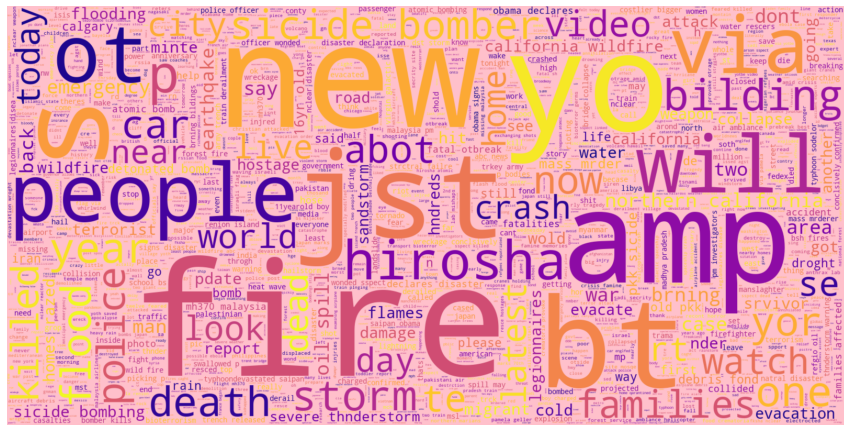

In [44]:
top_keyword= real_disaster['text'] #.fillna(value="")
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(top_keyword.str.lower())
#Plot:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="pink", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

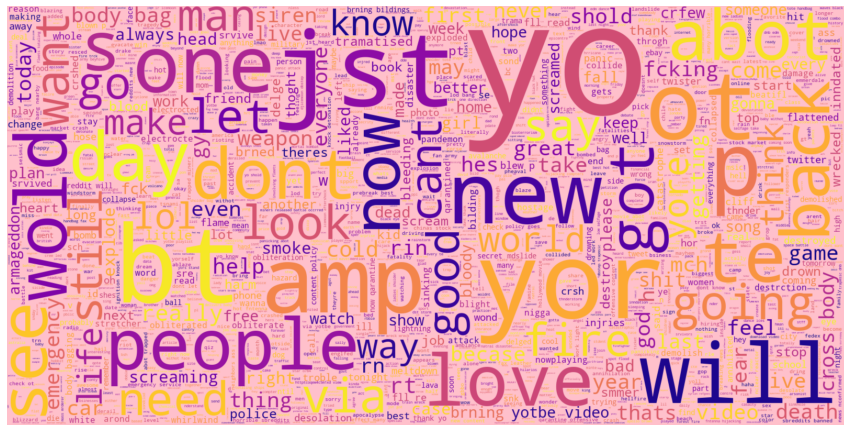

In [45]:
top_keyword= no_disaster['text'] #.fillna(value="")
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(top_keyword.str.lower())
#Plot:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="pink", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [37]:
data.loc[data['text'].str.contains('bt')]

,id,keyword,location,text,target,tweet_len,keyword_stem
36,54,ablaze,Pretoria,phdsqares mfc theyve bilt so mch hype arond ne...,0,21,ablaz
41,61,ablaze,NaN,on the otside yore ablaze and alive bt yore de...,0,11,ablaz
44,64,ablaze,NaN,i wanted to set chicago ablaze with my preachi...,0,14,ablaz
125,180,aftershock,304,sometes yo face difficlties not becase yore do...,0,18,aftershock
223,316,annihilated,USA,one thing for sregod has promised israel will ...,0,17,annihil
...,...,...,...,...,...,...,...
7494,10721,wreck,Greenville,the cort system is trly broken indeed bt then ...,0,19,wreck
7499,10727,wreck,709?,i still need to finish the lover bt watching t...,0,28,wreck
7546,10787,wrecked,NaN,good lck to everyone who has school soon bt yo...,0,16,wreck
7557,10803,wrecked,NaN,yo wrecked me never felt so low in my life bt ...,0,16,wreck
